In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [52]:
TV_data = pd.read_csv(r"Datasets\TV_data.csv")
TV_data_manga = pd.read_csv(r"Datasets\TV_data_manga.csv")

# Set up function for decision tree


In [67]:
source_list_unique = ["Manga", "Novel", "Game", "Other", "Audio", "Original"]
reference = ["high", "low", "mid"]
reference2 = ["low", "high"]

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree 

def decTree(y, x, class_name, depth):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)    
    dectree = DecisionTreeClassifier(max_depth = depth)
    dectree.fit(X_train, Y_train)
    Y_train_pred = dectree.predict(X_train)
    Y_test_pred = dectree.predict(X_test)
    cm = confusion_matrix(Y_train, Y_train_pred)
    TP = cm[1][1]/(cm[1][1] + cm[1][0])
    FP = cm[0][1]/(cm[0][1] + cm[0][0])
    cm1 = confusion_matrix(Y_test, Y_test_pred)
    TP1 = cm1[1][1]/(cm1[1][1] + cm1[1][0])
    FP1 = cm1[0][1]/(cm1[0][1] + cm1[0][0])
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", dectree.score(X_train, Y_train))
    #print("True Positive Rate \t:", TP)
    #print("False Positive Rate\t:", FP)
    print()
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", dectree.score(X_test, Y_test))
    #print("True Positive Rate \t:", TP1)
    #print("False Positive Rate\t:", FP1)
    print()
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
    f = plt.figure(figsize=(48,48))
    plot_tree(dectree, filled=True, rounded=True, 
              feature_names="Fav%", 
              class_names=class_name)

### Decision tree will predict everything as manga, hence we import manga data and focus on anime sourced from manga

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.45889945652173914

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.4206241519674355



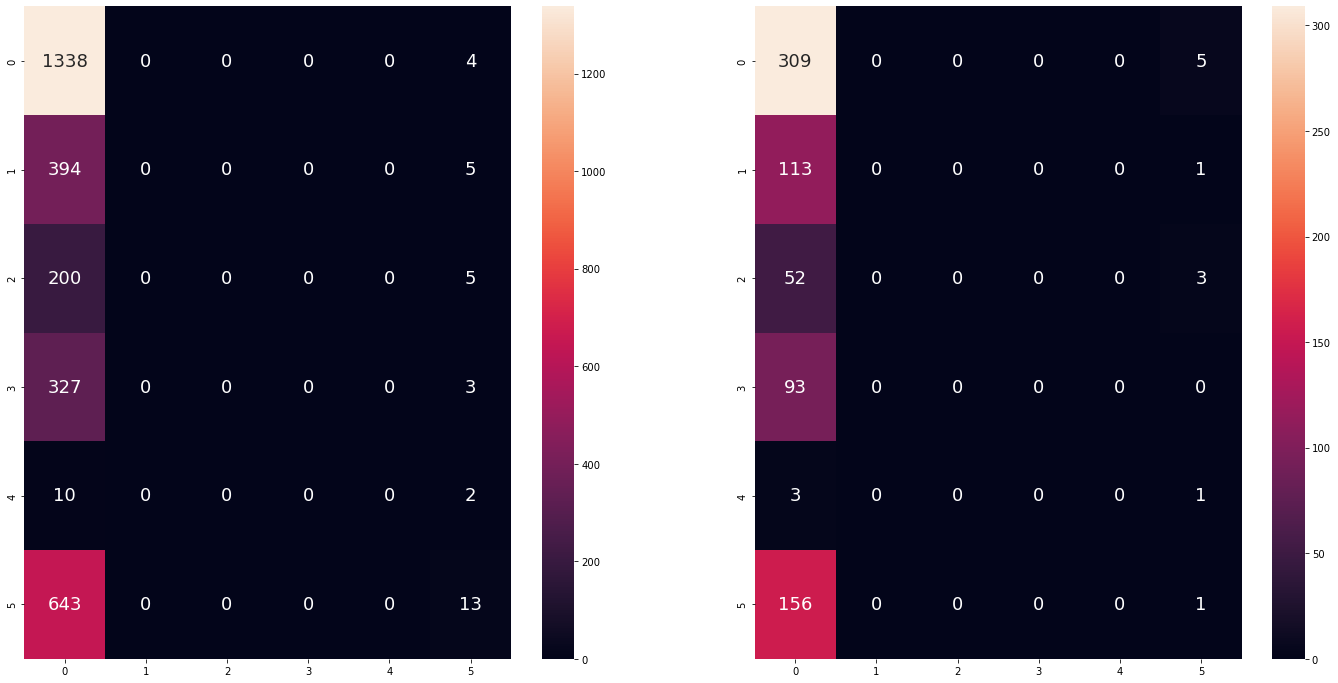

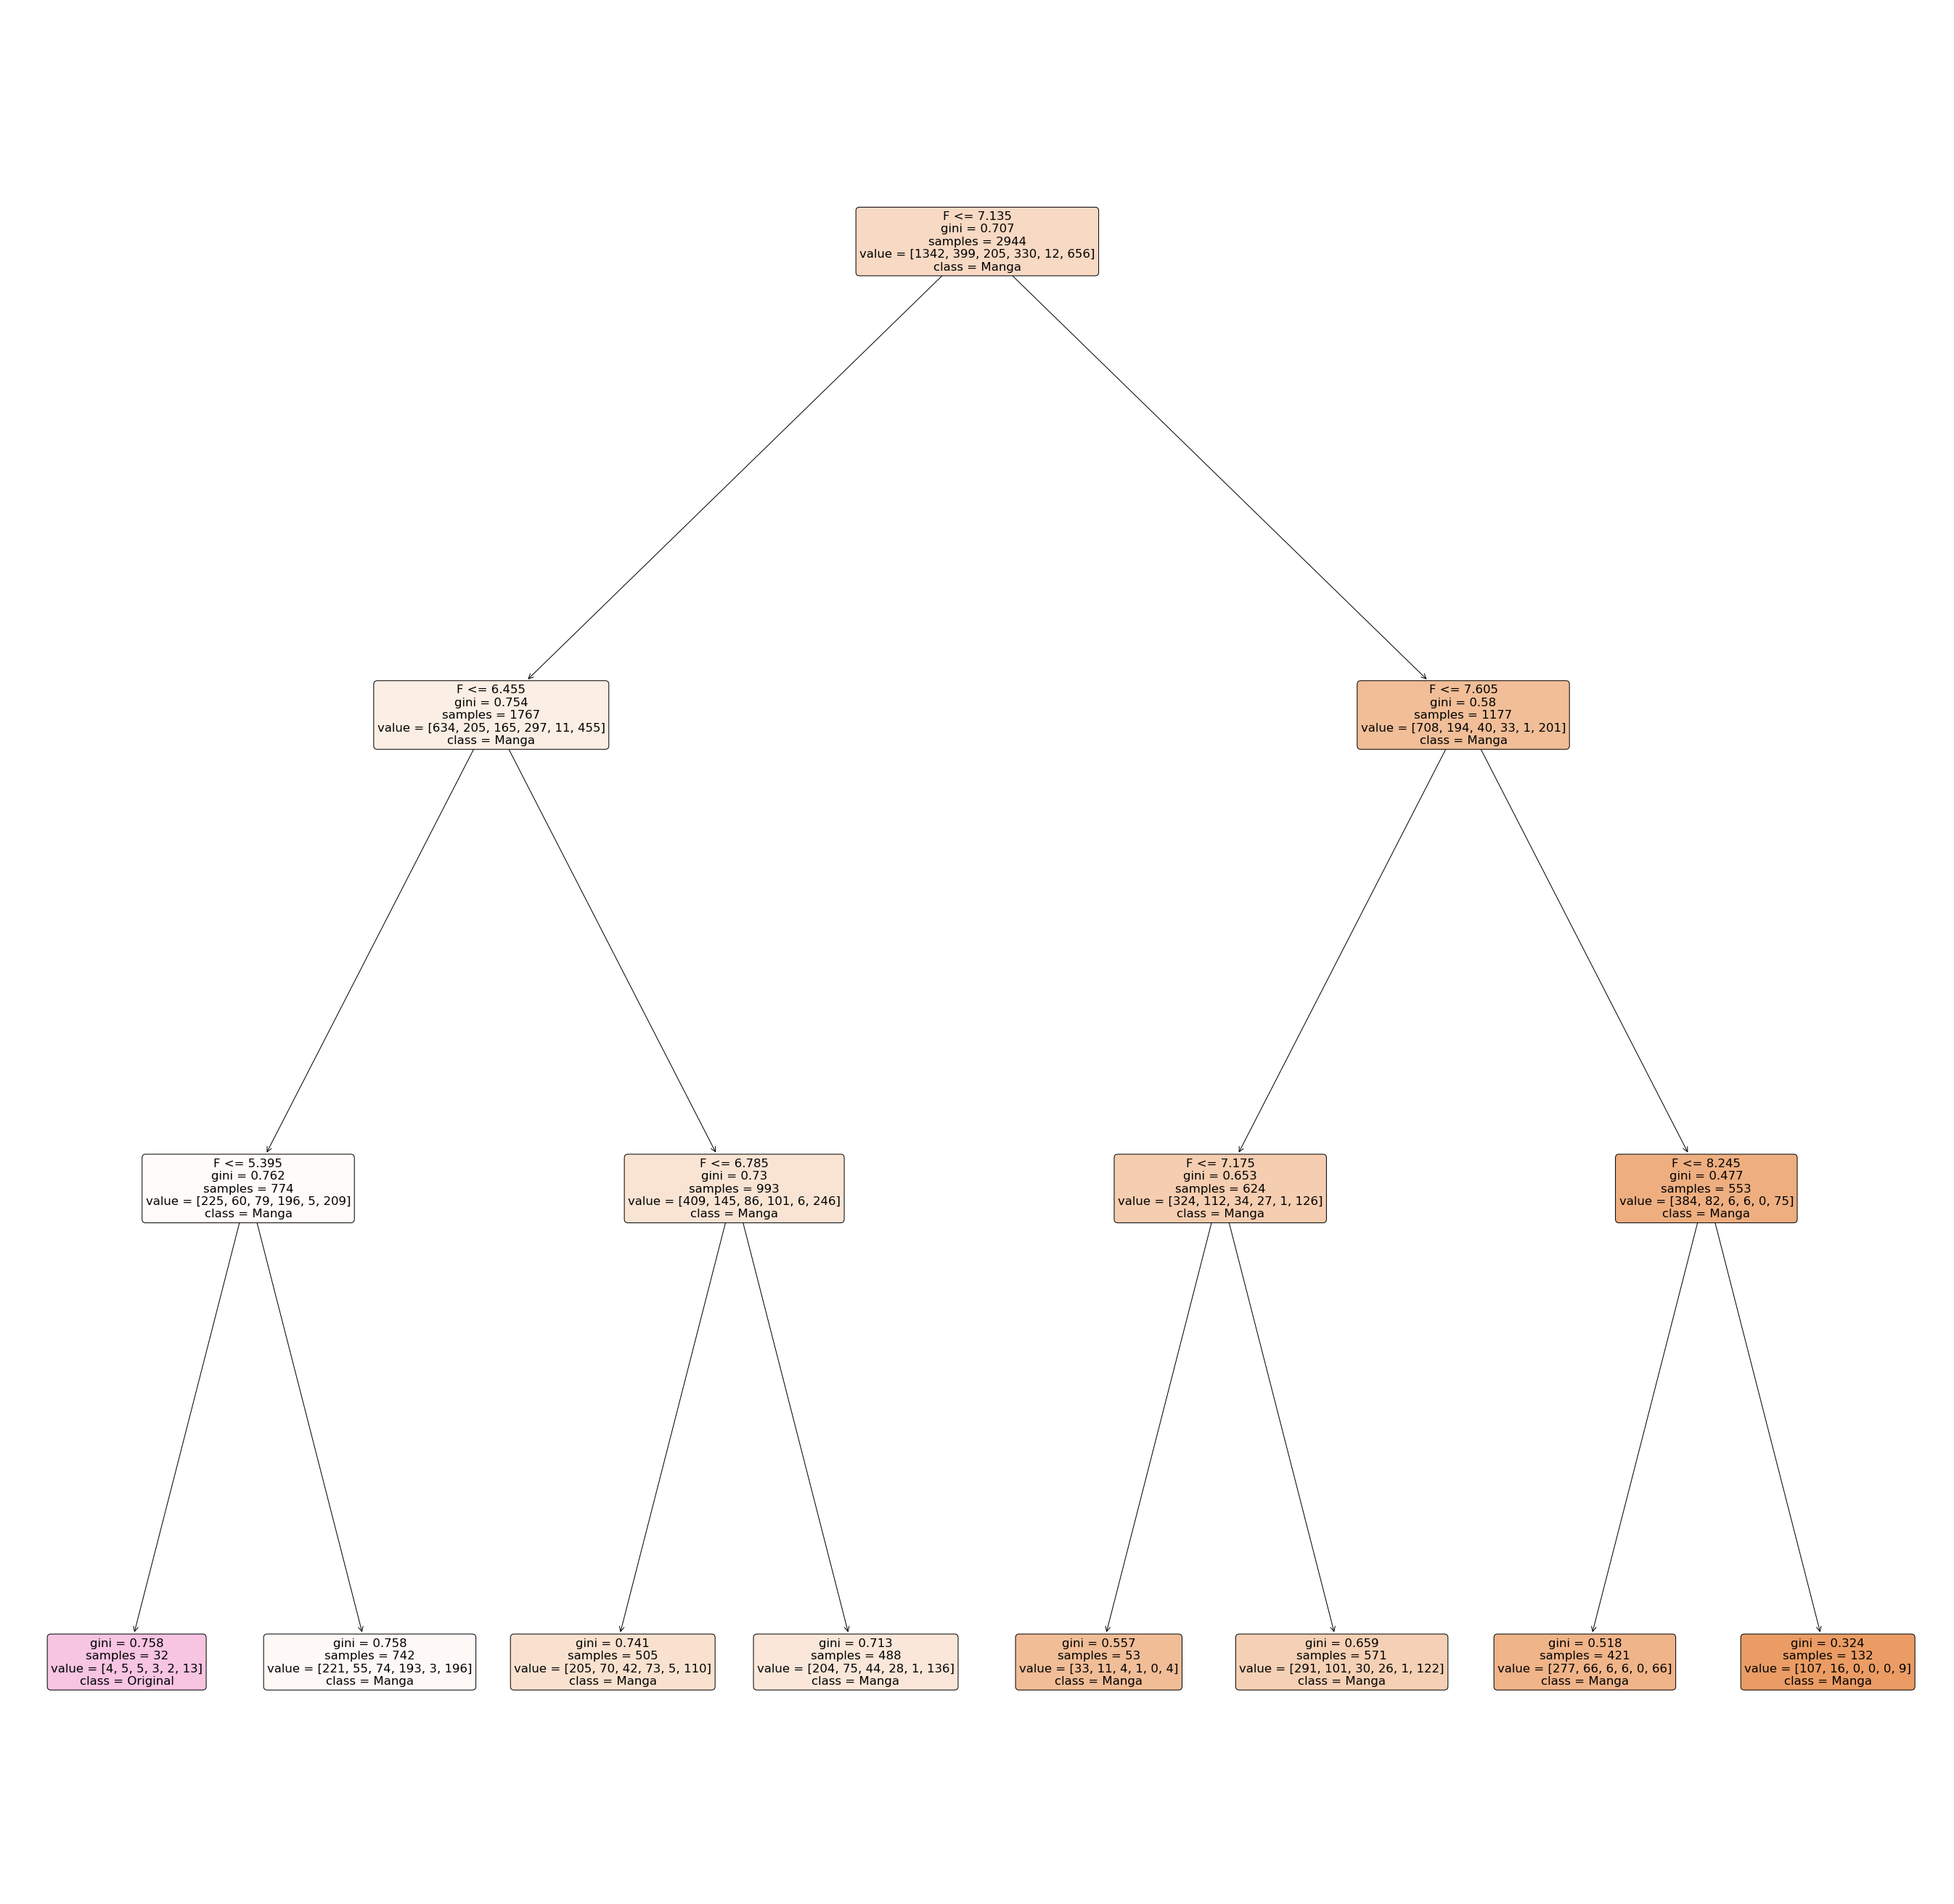

In [55]:
decTree(TV_data["Source_reference"].to_numpy().reshape(-1,1),
        TV_data["Score"].to_numpy().reshape(-1,1),
        source_list_unique,
        3)

## Linear regression is not viable as there is little cooreleation between score and other IVs
### Try polynomial regression but is also not viable

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X1 = TV_data_manga["genre_reference_1"].iloc[:3000].to_numpy().reshape(-1,1) #0.20 without
X2 = TV_data_manga["genre_reference_2"].iloc[:3000].to_numpy().reshape(-1,1) #0.18 without
X3 = TV_data_manga["Season"].iloc[:3000].to_numpy().reshape(-1,1) #0.25 without
X4 = TV_data_manga["Source_reference"].iloc[:3000].to_numpy().reshape(-1,1) ##0.12 without
X5 = TV_data_manga['Members'].iloc[:3000].to_numpy().reshape(-1,1) #0.32 without (deg9)
X6 = TV_data_manga['Episodes'].iloc[:3000].to_numpy().reshape(-1,1) #0.39 without, aka useless
X = np.concatenate((X1, X2, X3, X4, X5), axis=1) #0.39 with X1-5 deg2
y = TV_data_manga["Score"].iloc[:3000]

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

r_sq = model.score(X_poly, y)
print('R^2 score:', r_sq)

R^2 score: 0.3569153041870662


## Use decision tree on score_reference and manga_score
### As majority of shows are "mid", decision tree will predict everything as mid

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8019720624486442

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7508196721311475



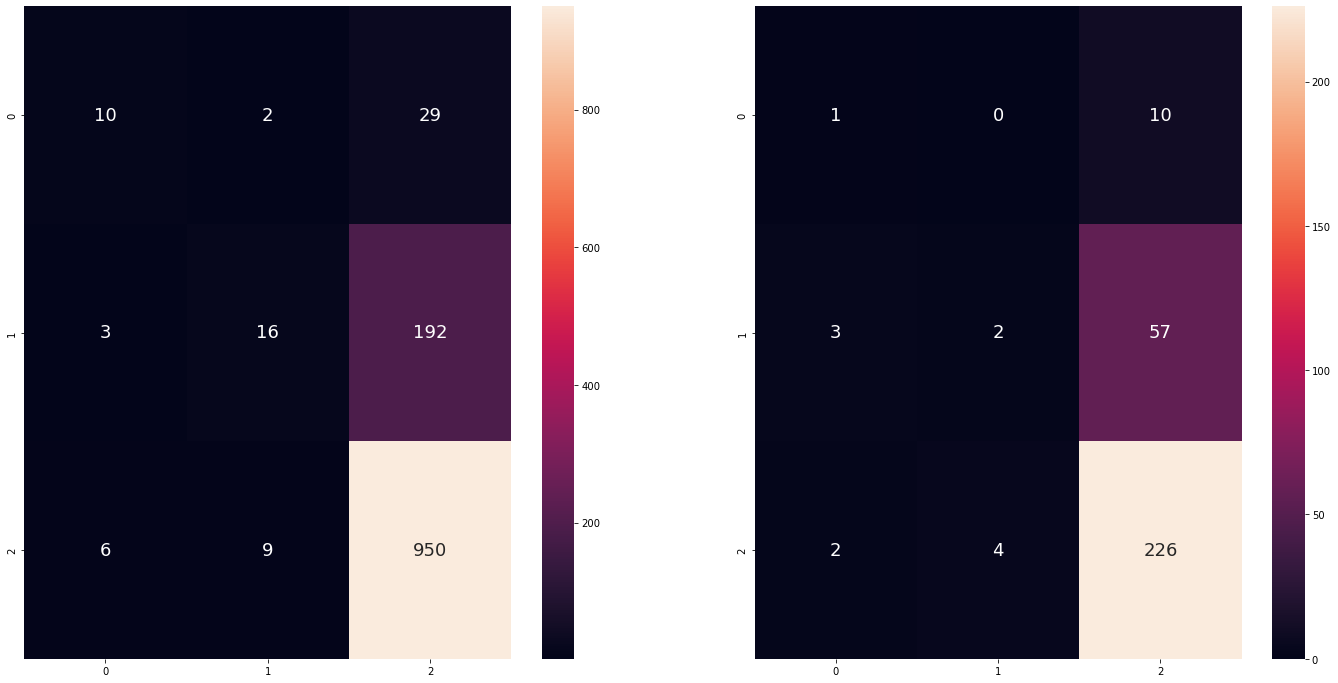

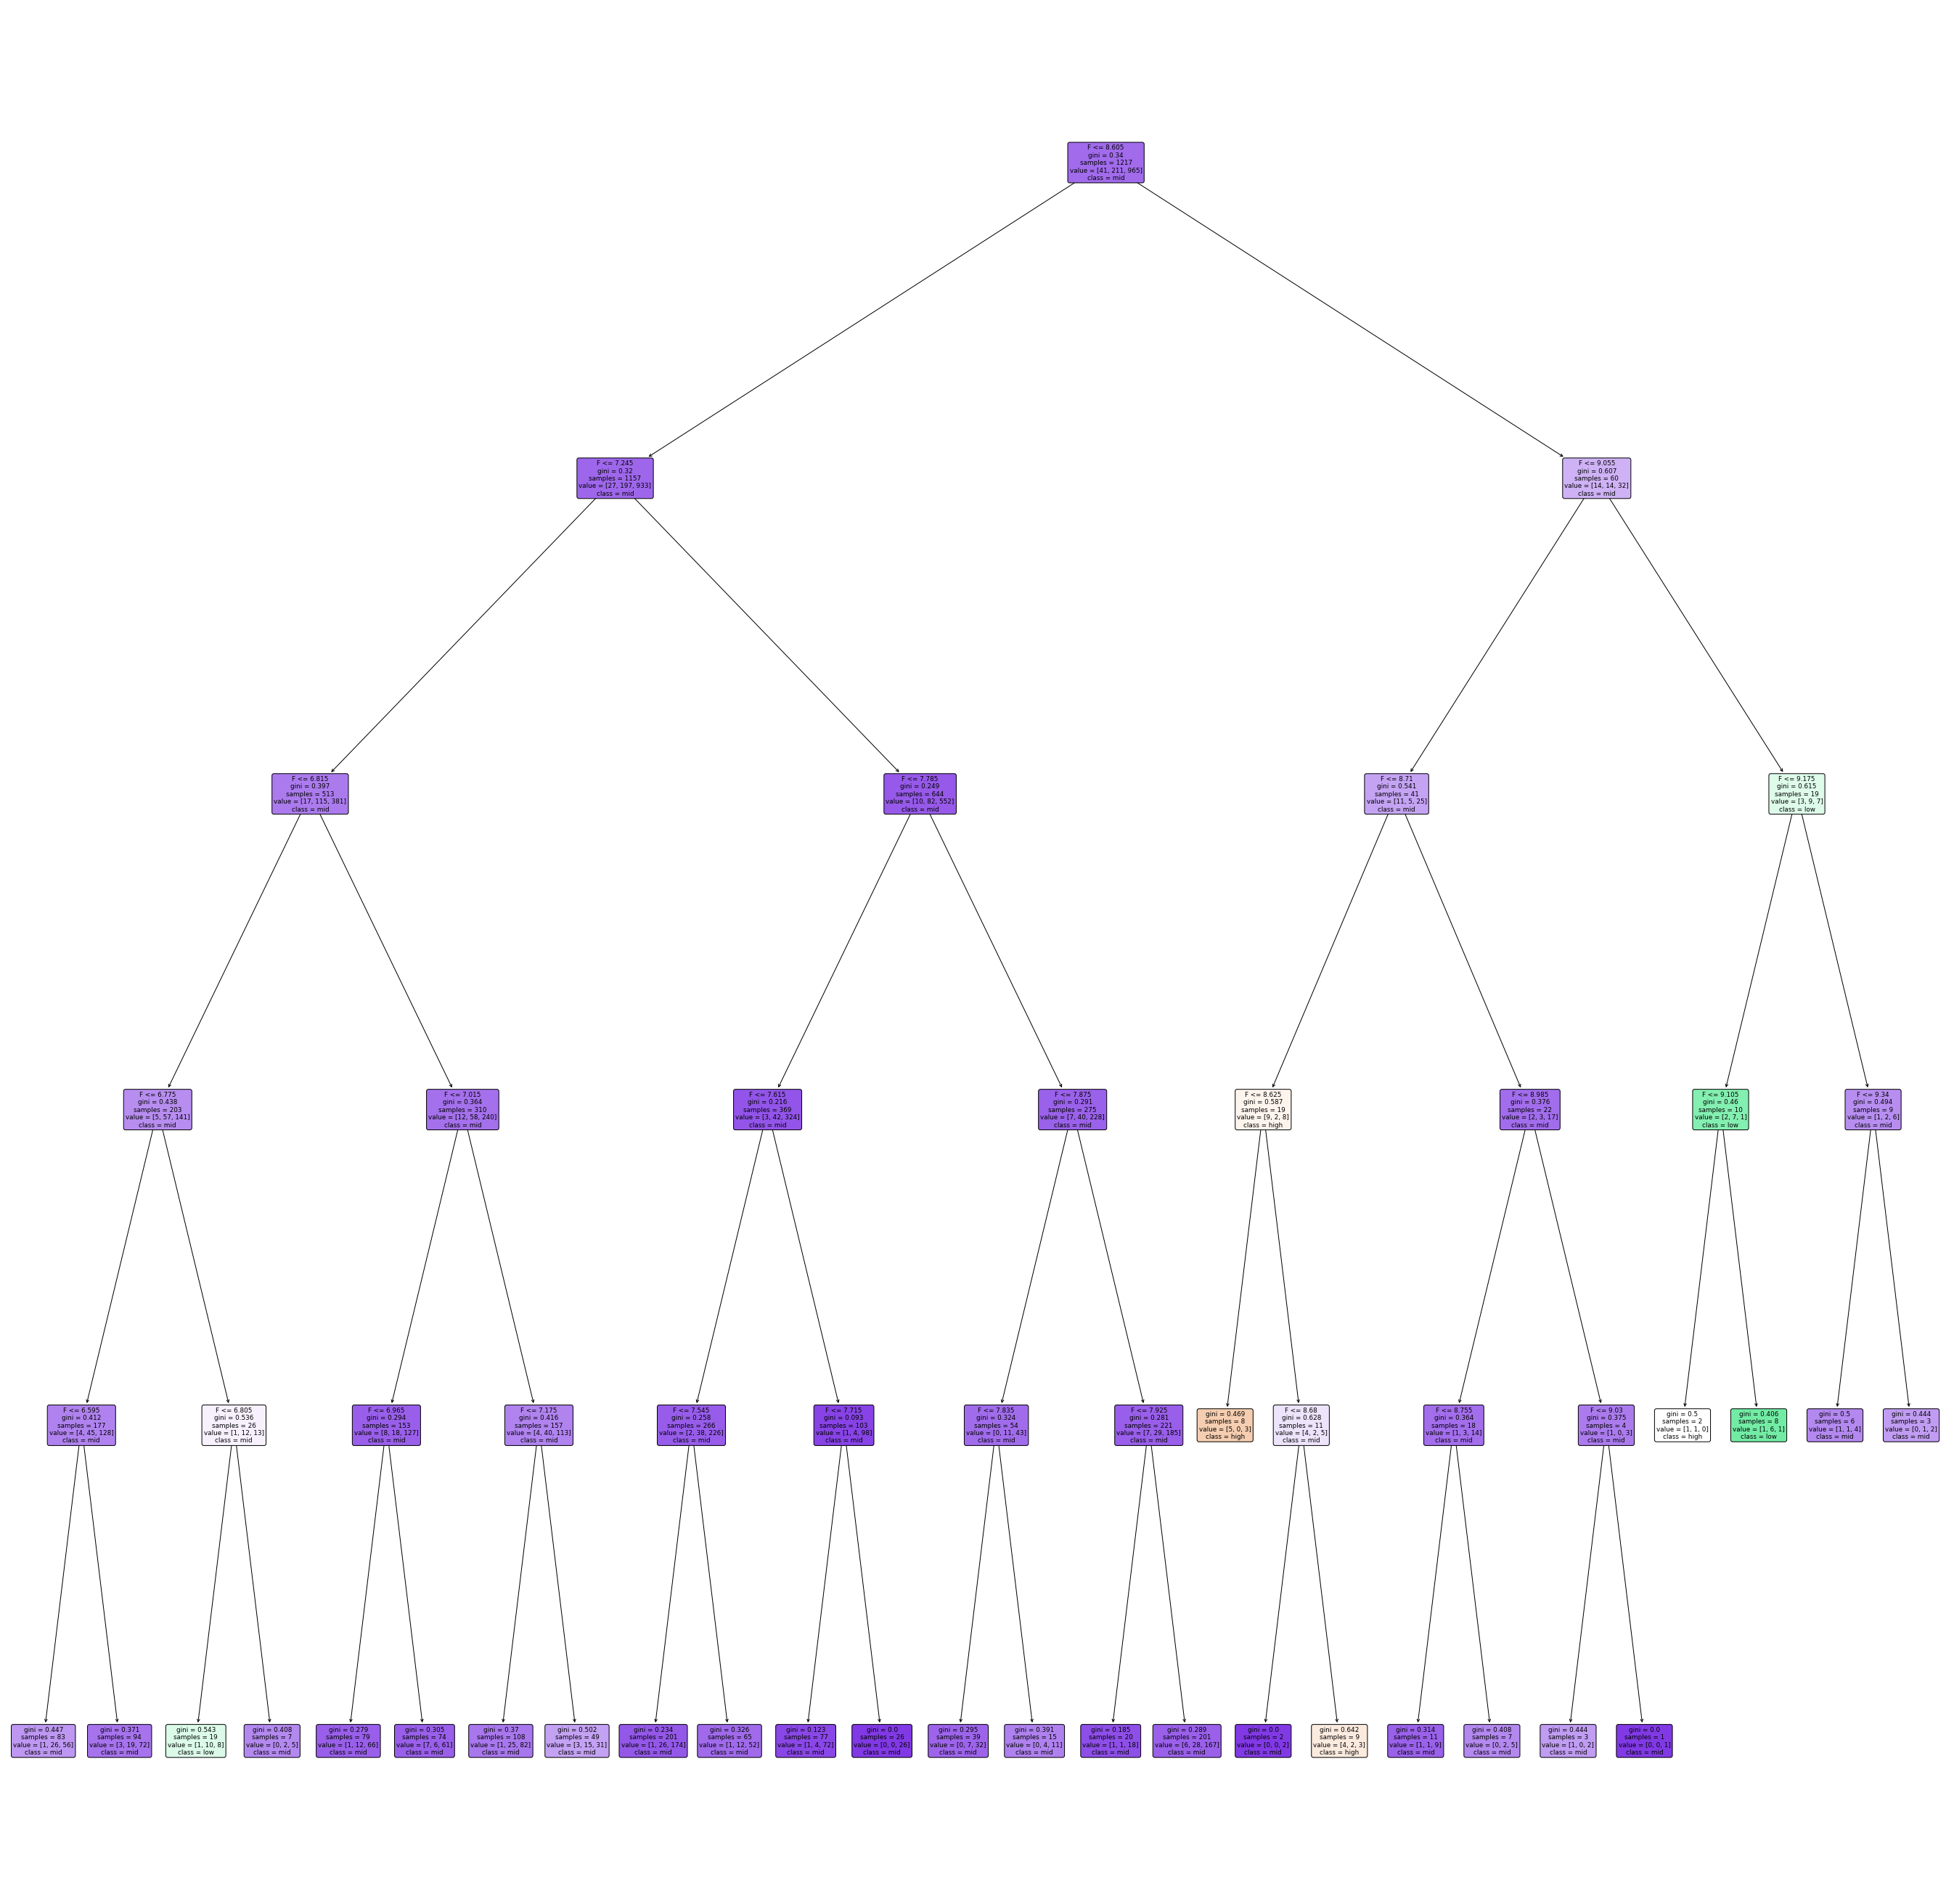

In [77]:
decTree(TV_data_manga["Score_reference"].to_numpy().reshape(-1,1),
        TV_data_manga["Manga_score"].to_numpy().reshape(-1,1),
        reference,
        5)

## Use decision tree on score_reference instead
### Any show with a score >= 7.5 is considered worth watching
### Generally, higher manga score -> higher anime score

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7025472473294988

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6918032786885245



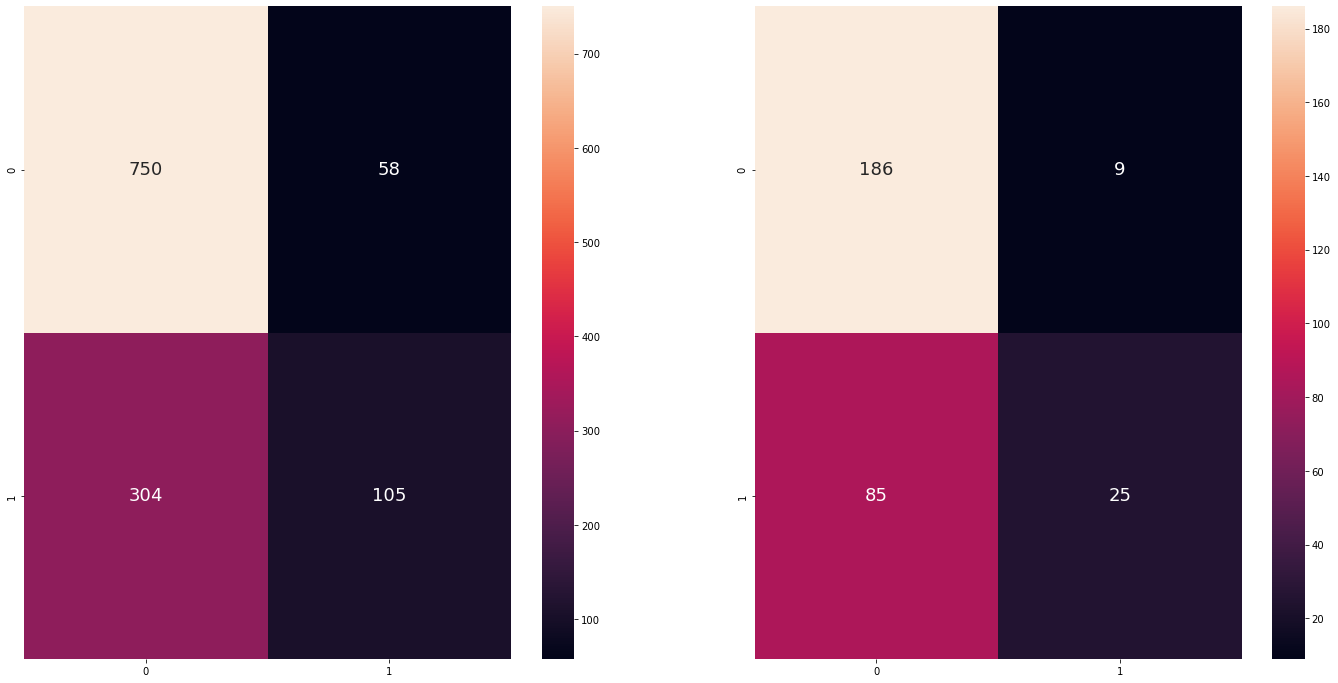

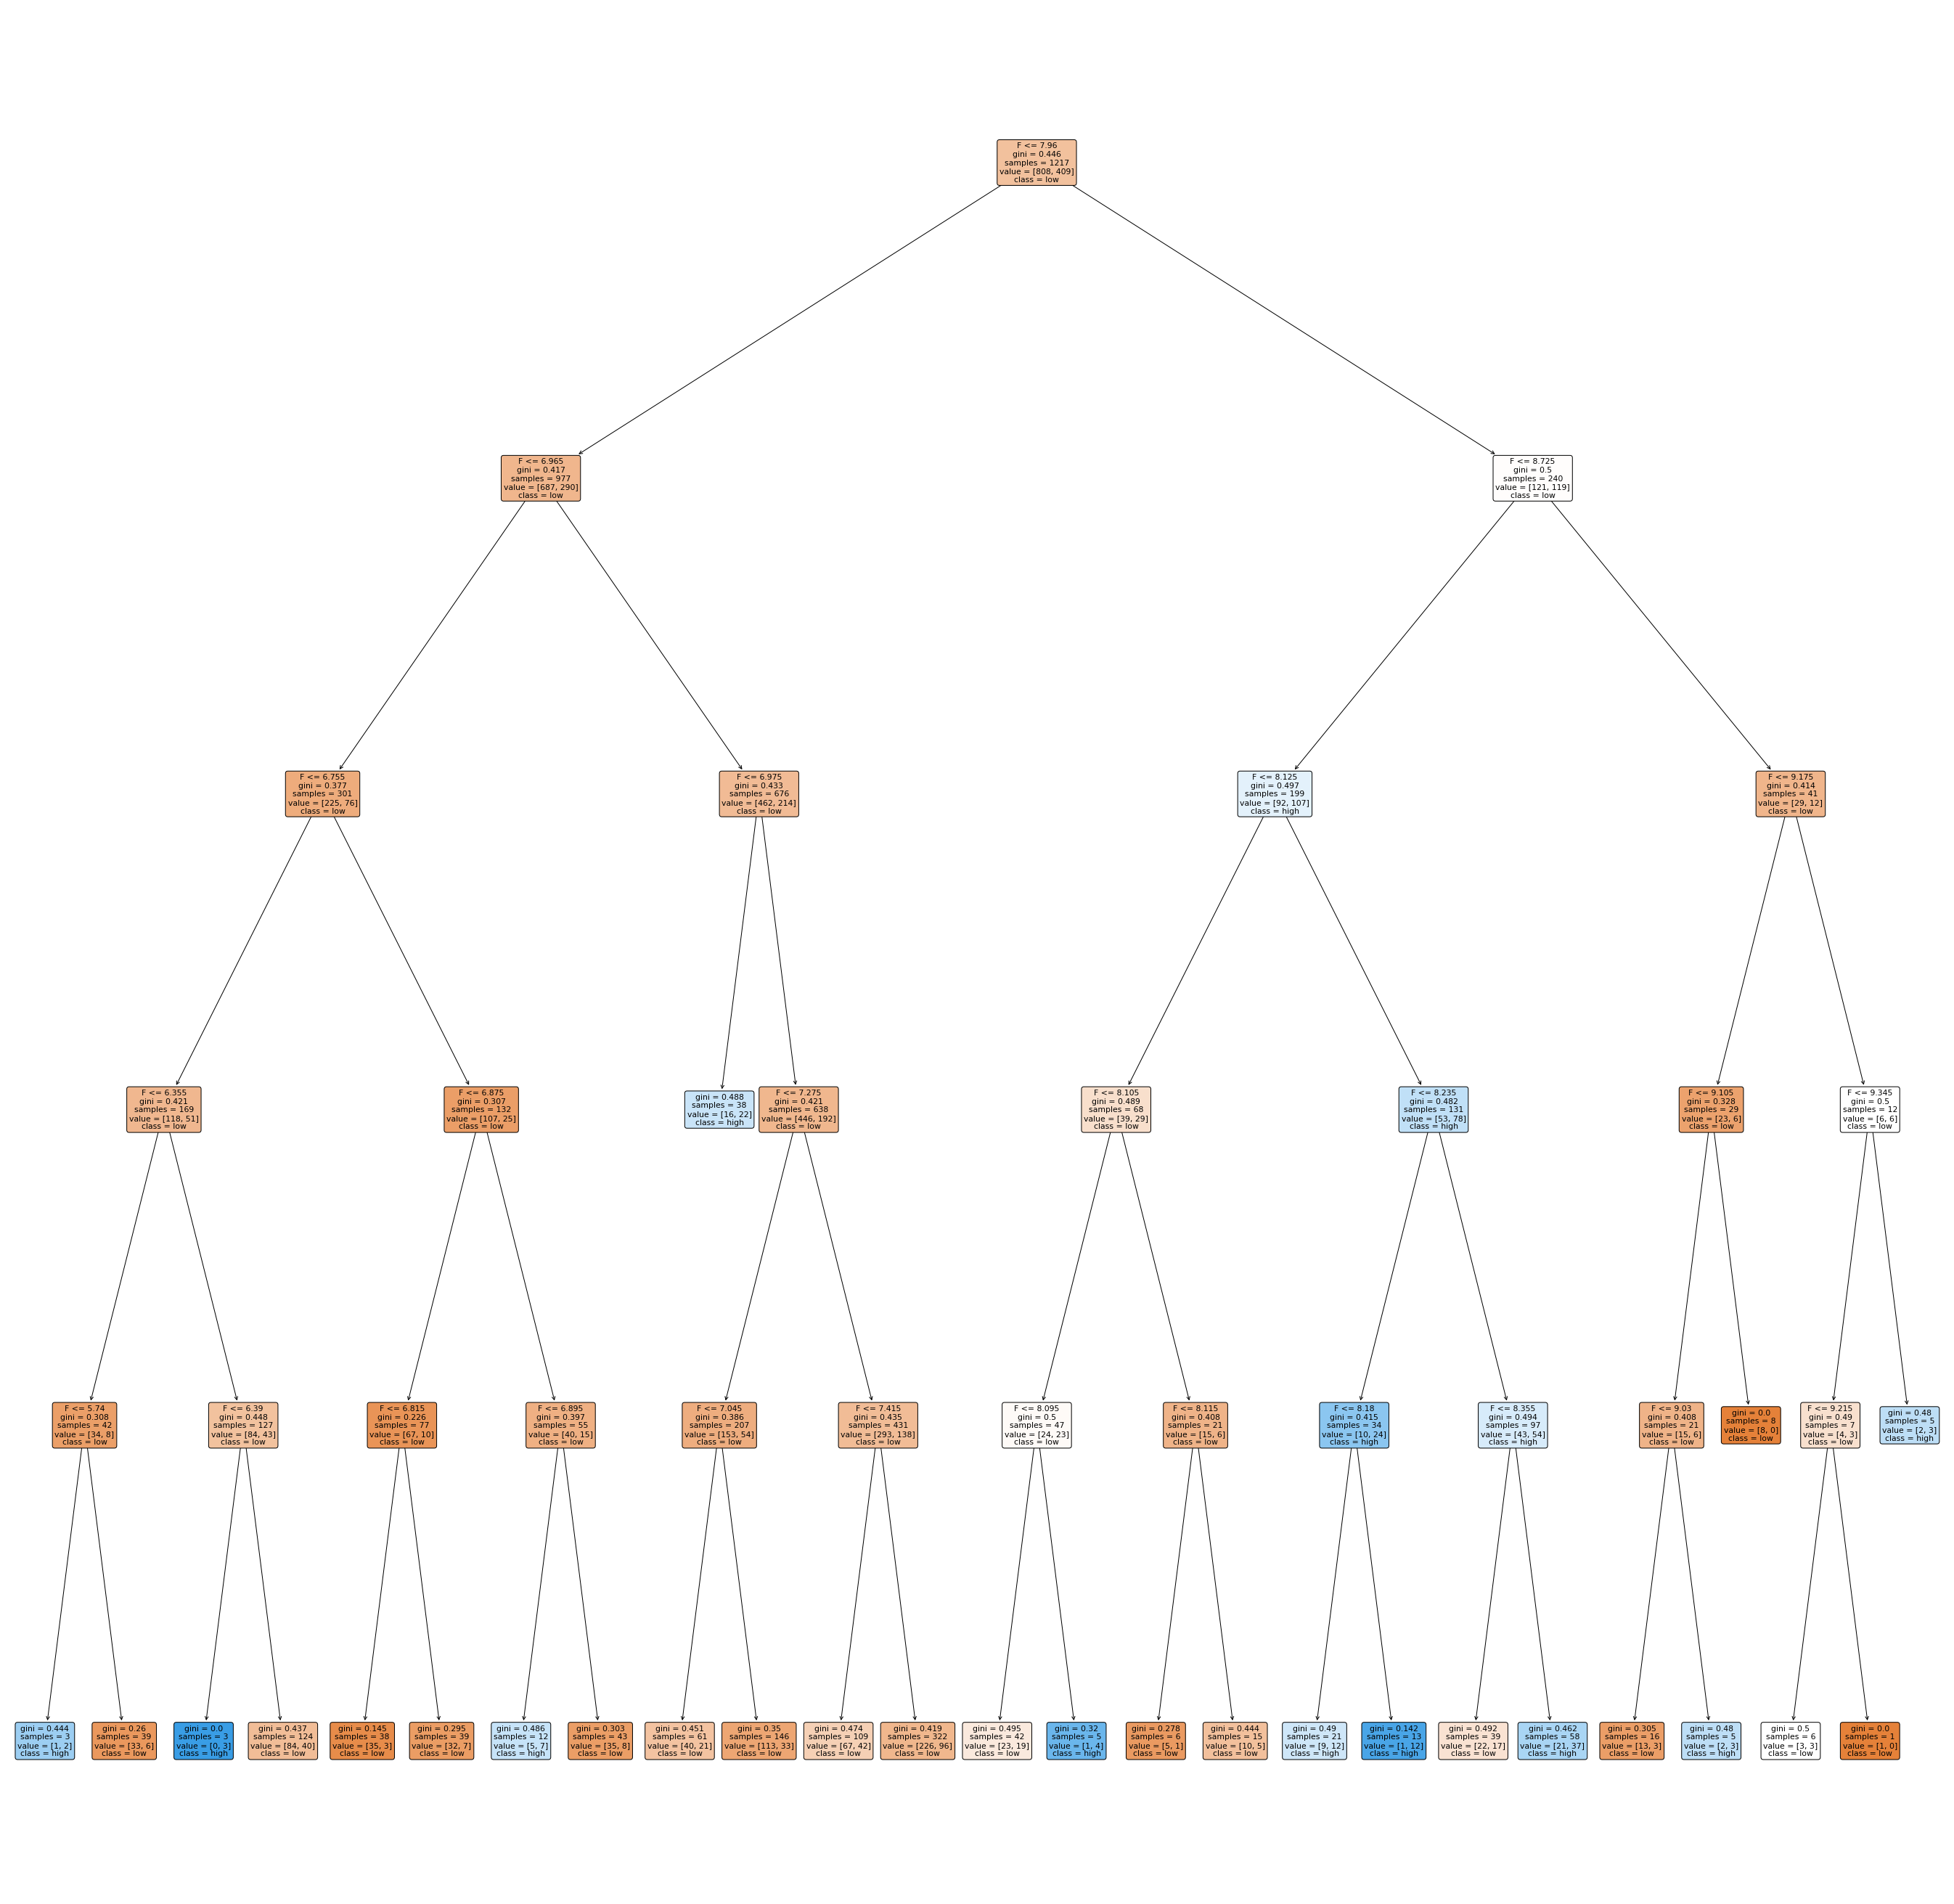

In [79]:
decTree(TV_data_manga["Score_reference2"].to_numpy().reshape(-1,1),
        TV_data_manga["Manga_score"].to_numpy().reshape(-1,1),
        reference2,
        5)

## Decision tree with 2 IVs for genre 1 and genre 2

In [80]:
def decTree2(y, x1, x2, depth):
    x = pd.concat([x1, x2], axis=1)
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)    
    dectree = DecisionTreeClassifier(max_depth = depth)
    dectree.fit(X_train, Y_train)
    Y_train_pred = dectree.predict(X_train)
    Y_test_pred = dectree.predict(X_test)
    cm = confusion_matrix(Y_train, Y_train_pred)
    TP = cm[1][1]/(cm[1][1] + cm[1][0])
    FP = cm[0][1]/(cm[0][1] + cm[0][0])
    cm1 = confusion_matrix(Y_test, Y_test_pred)
    TP1 = cm1[1][1]/(cm1[1][1] + cm1[1][0])
    FP1 = cm1[0][1]/(cm1[0][1] + cm1[0][0])

    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", dectree.score(X_train, Y_train))
    #print("True Positive Rate \t:", TP)
    #print("False Positive Rate\t:", FP)
    print()
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", dectree.score(X_test, Y_test))
    #print("True Positive Rate \t:", TP1)
    #print("False Positive Rate\t:", FP1)
    print()
    f, axes = plt.subplots(1, 2, figsize=(24, 48))
    sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
    f = plt.figure(figsize=(48,48))
    plot_tree(dectree, filled=True, rounded=True, 
              feature_names="Fav%", 
              class_names=['Null',
 'Action',
 'Military',
 'Adventure',
 'Comedy',
 'Drama',
 'Magic',
 'Fantasy',
 'Shounen',
 'Thriller',
 'Sci-Fi',
 'Historical',
 'Parody',
 'Samurai',
 'Super Power',
 'Mystery',
 'Game',
 'Seinen',
 'Slice of Life',
 'Supernatural',
 'Romance',
 'Vampire',
 'Mecha',
 'Sports',
 'School',
 'Space',
 'Psychological',
 'Josei',
 'Music',
 'Horror',
 'Police',
 'Demons',
 'Shoujo',
 'Martial Arts',
 'Shounen Ai',
 'Ecchi',
 'Kids',
 'Shoujo Ai',
 'Dementia',
 'Harem',
 'Cars'])

## Due to large number of action genre and unspecificed genre, decision tree is not useful

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6803615447822514

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6622950819672131



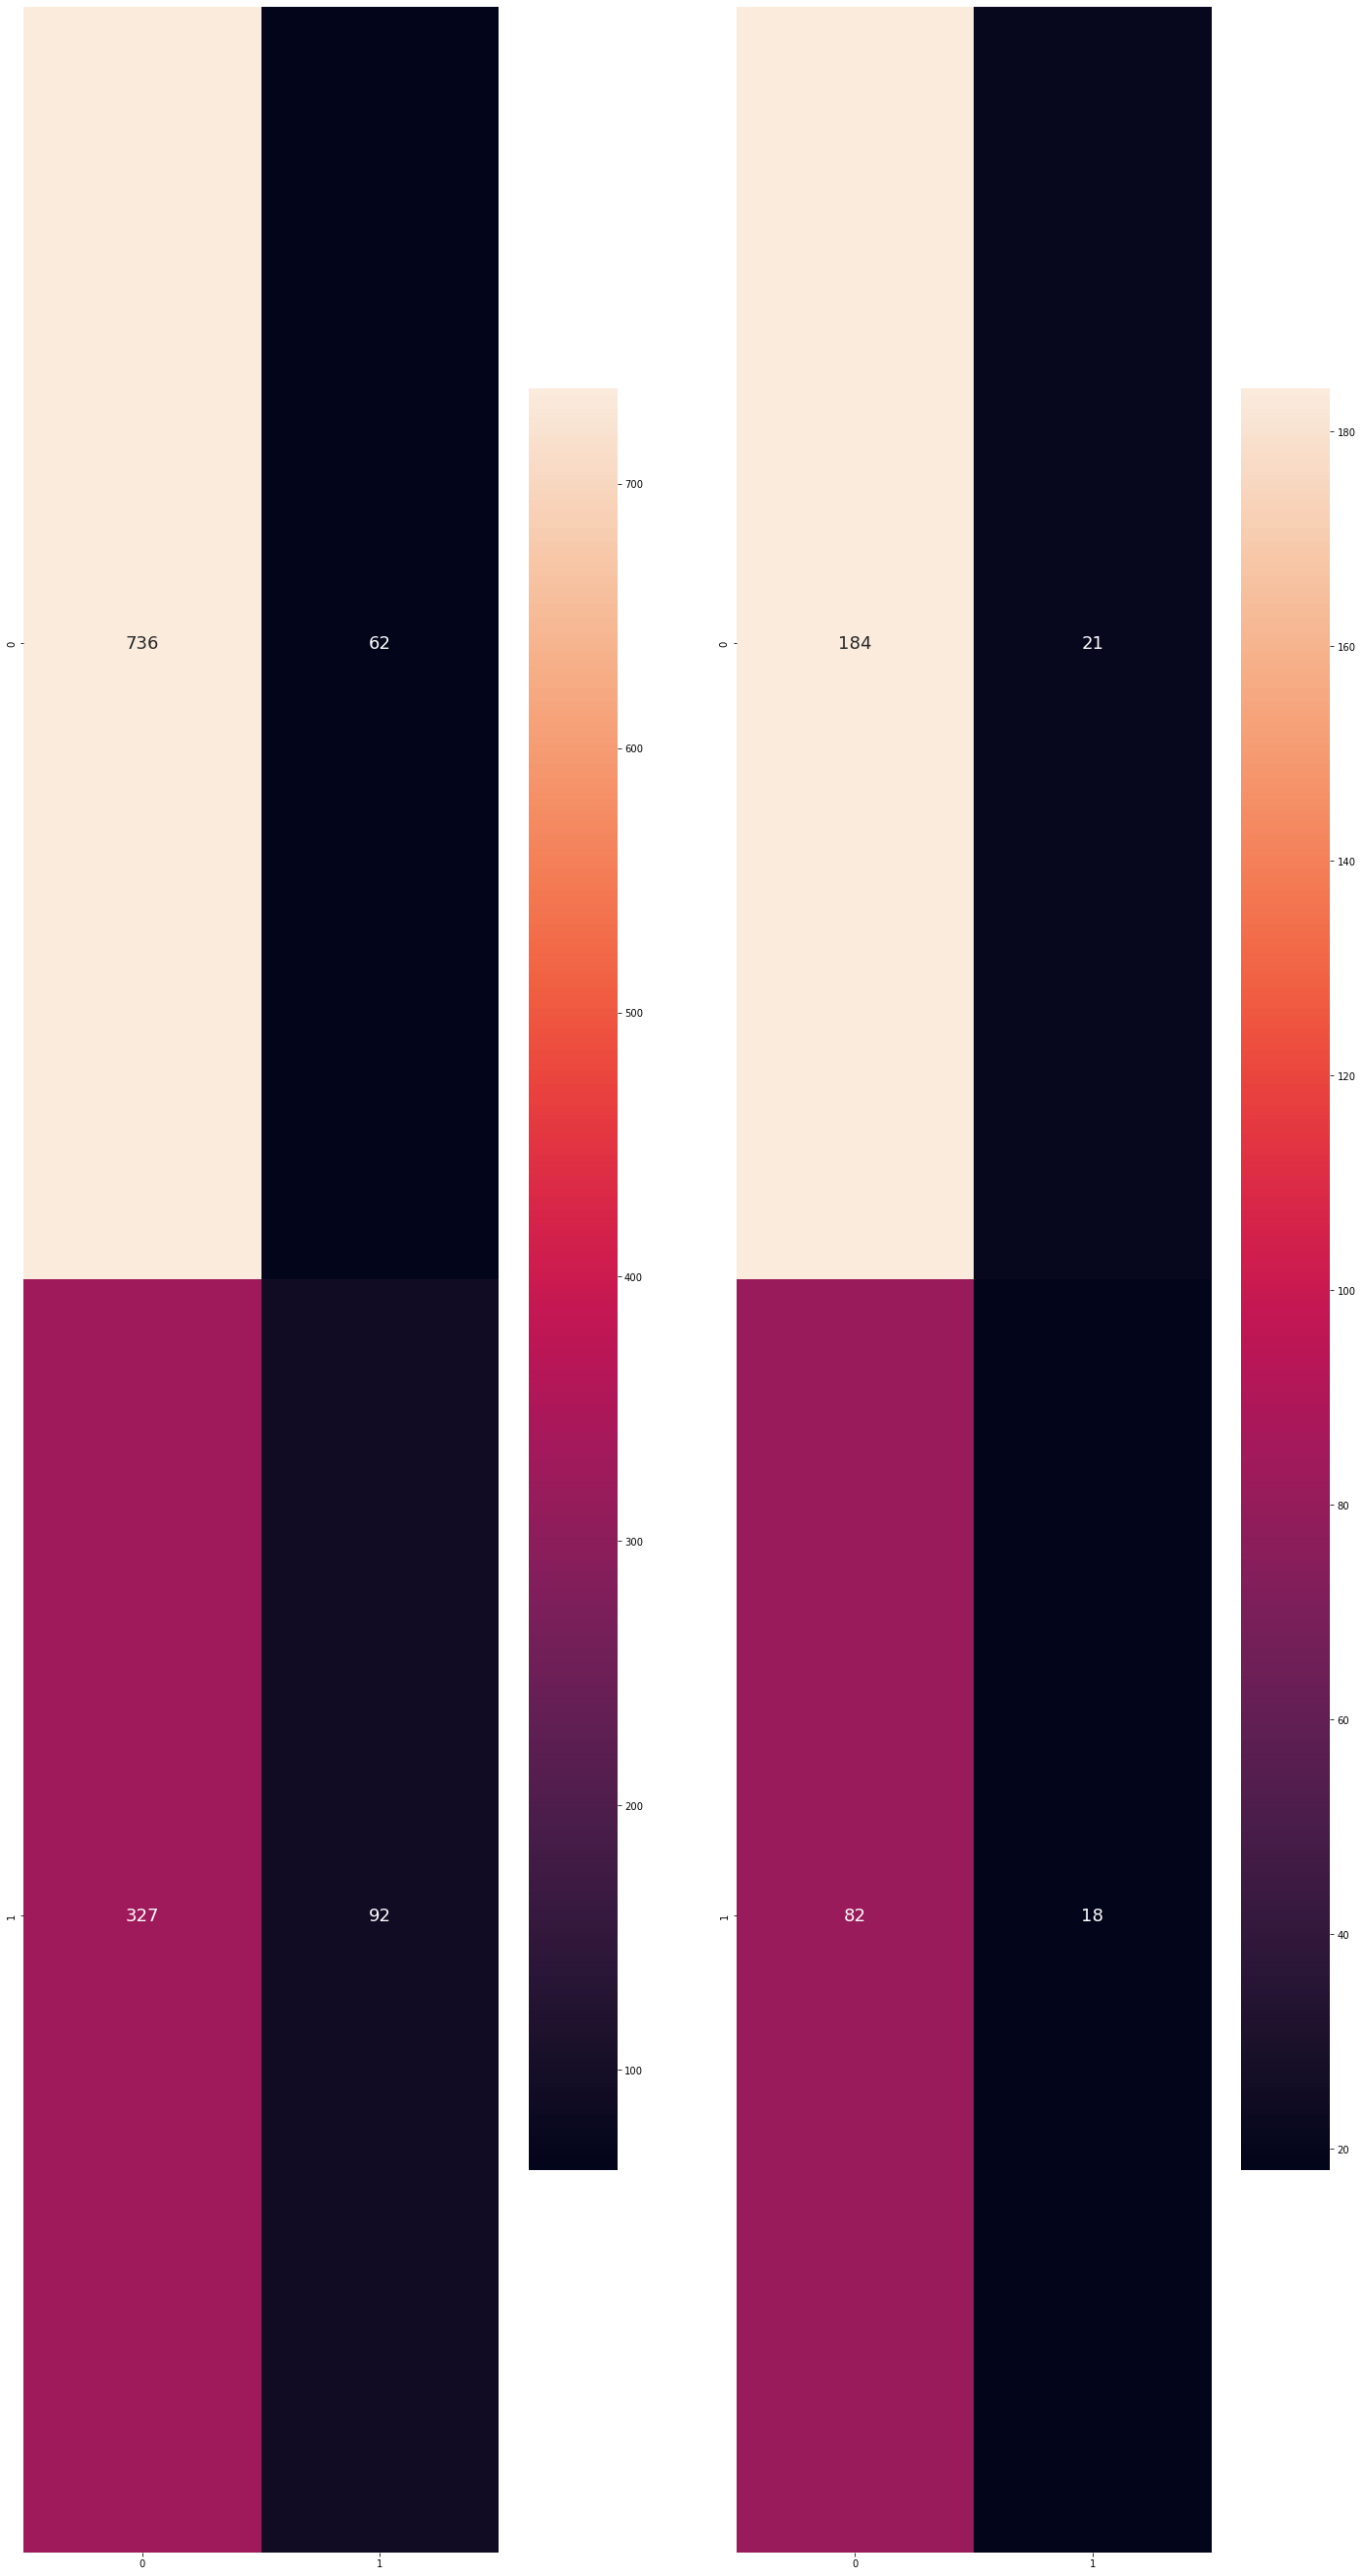

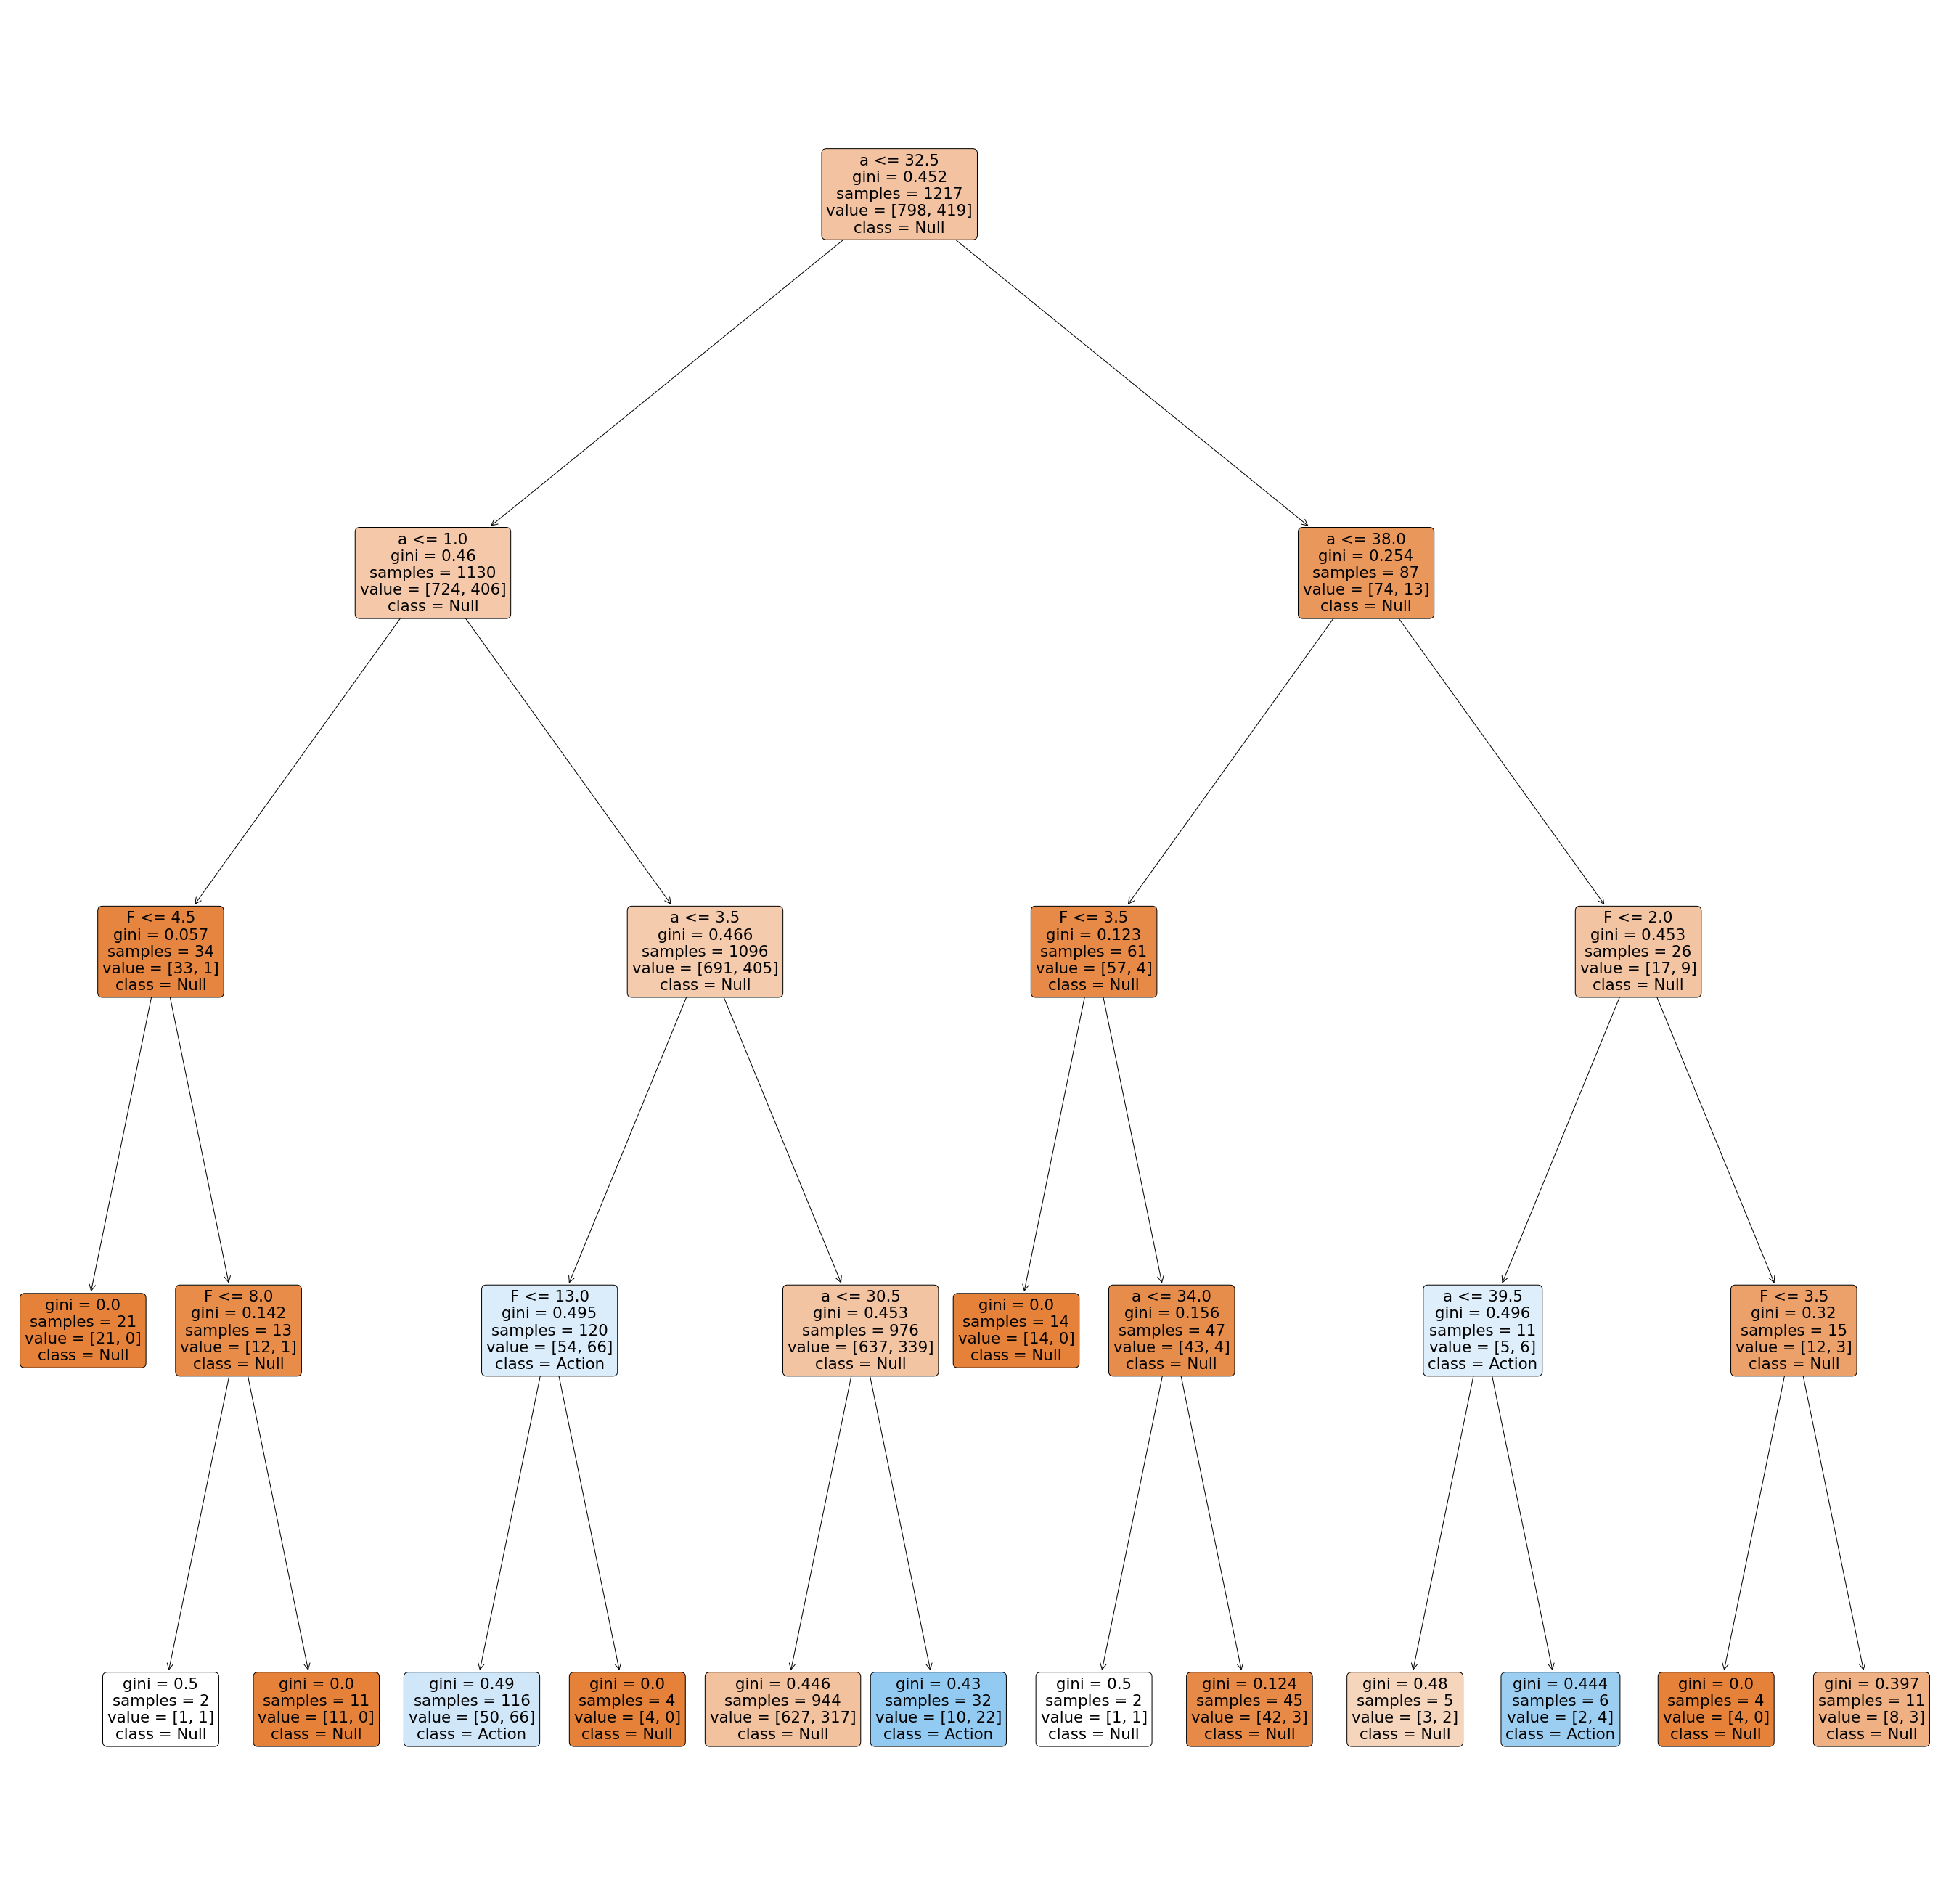

In [81]:
decTree2(TV_data_manga["Score_reference2"].to_numpy().reshape(-1,1),TV_data_manga["genre_reference_1"],
        TV_data_manga["genre_reference_2"],4)

## Run decision tree on anime  older than 5 years old

In [85]:
age5 = TV_data_manga[TV_data_manga["Age"]>5]

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8185096153846154

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.84688995215311



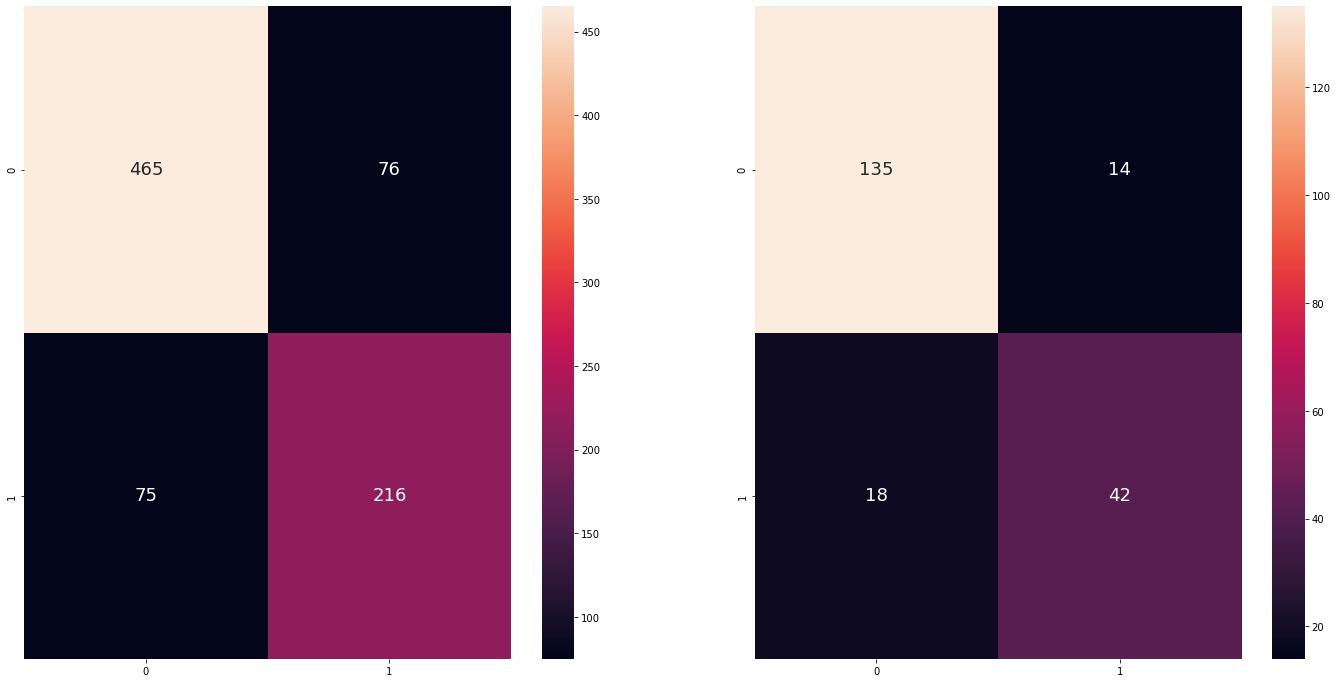

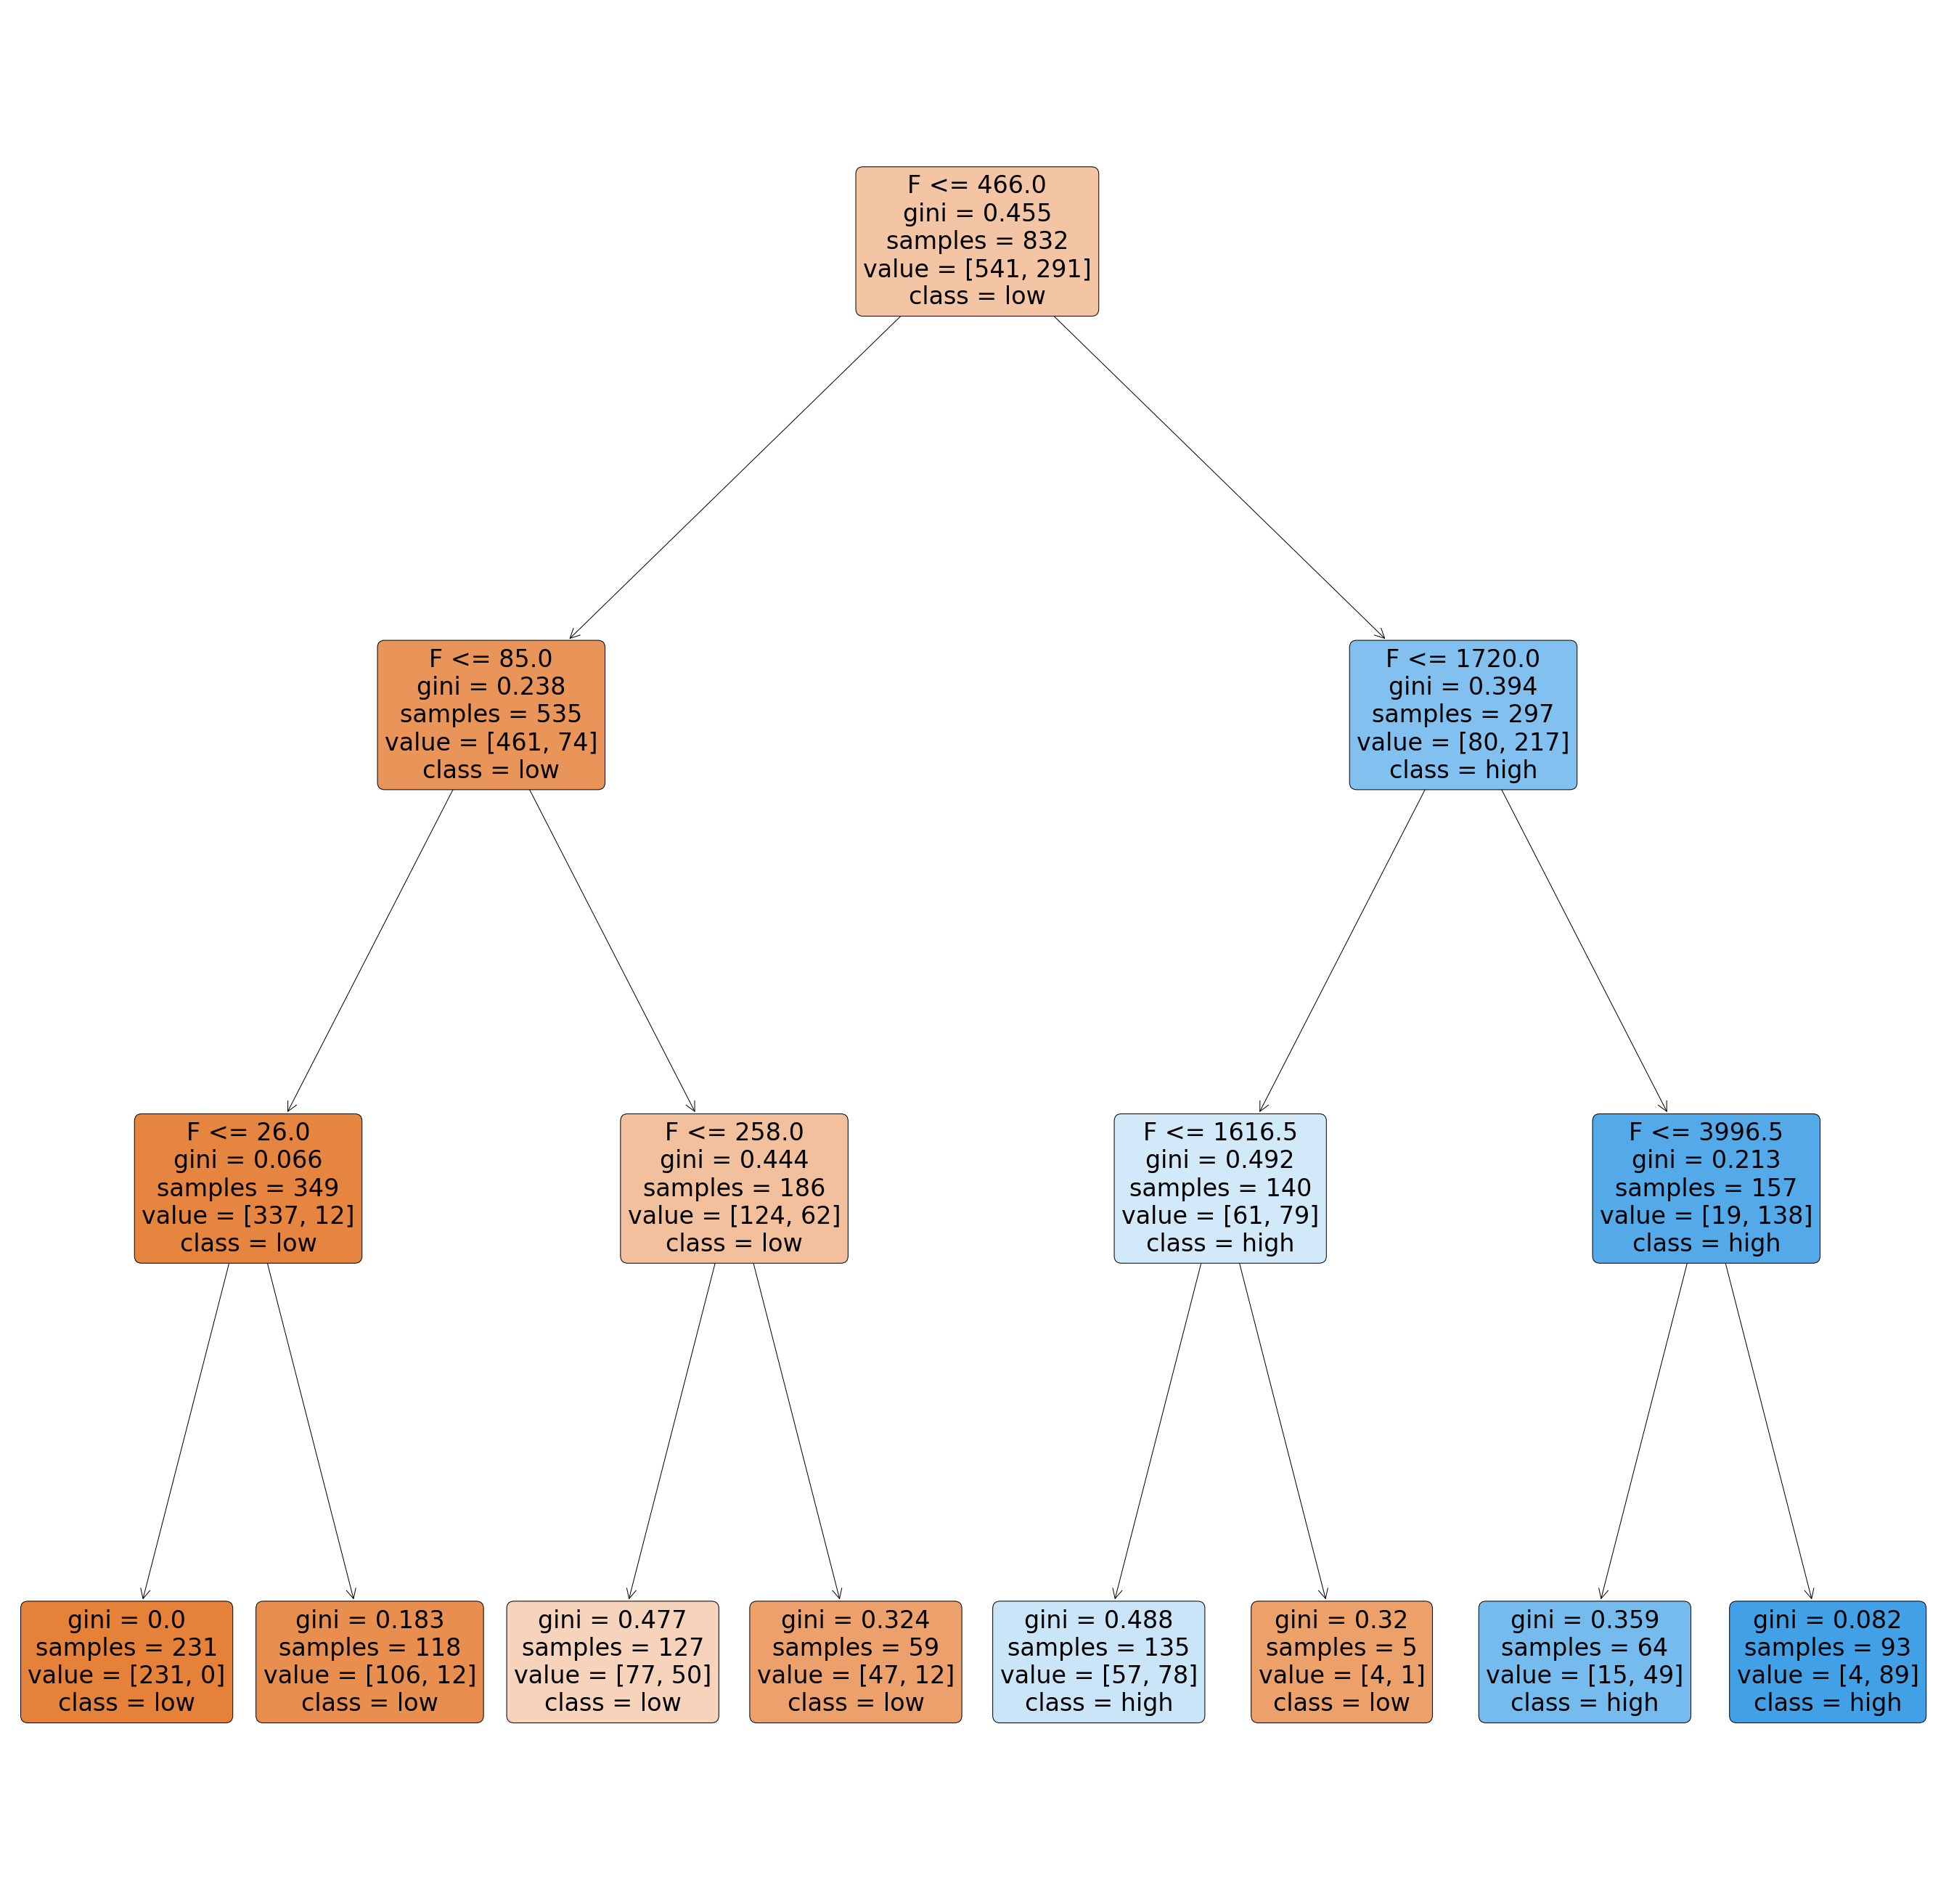

In [88]:
decTree(age5["Score_reference2"].to_numpy().reshape(-1,1),
        age5["Favorites"].to_numpy().reshape(-1,1),
        reference2,
        3)

## Set up CV to fine optimal depth for decision trees

In [89]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from pprint import pprint

scores_list = []
def crossV(y, X, depth):  
    dectree = DecisionTreeClassifier(max_depth = depth)
    scores = cross_val_score(dectree, X, y, cv=5)
    scores_list.append(np.mean(scores))
    print("Depth of", depth)
    print(np.mean(scores))

Depth of 1
0.6504551337359793
Depth of 2
0.6622778257118205
Depth of 3
0.666876617773943
Depth of 4
0.6583369283865401
Depth of 5
0.6668960310612597
Depth of 6
0.6570513373597929
Depth of 7
0.6655867126833477
Depth of 8
0.6622929249352889
Depth of 9
0.651786022433132
Depth of 10
0.6531039689387403
Depth of 11
0.6478343399482311
Depth of 12
0.6465336496980155
Depth of 13
0.6445578084555652
Depth of 14
0.6445599654874893


<AxesSubplot:xlabel='depth', ylabel='score'>

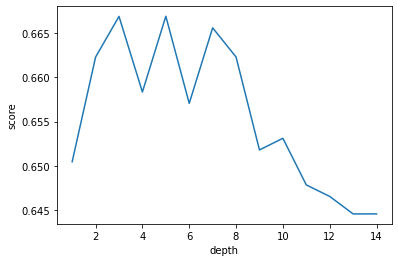

In [90]:
scores_list = []
for i in range(1,15):
    crossV(TV_data_manga["Score_reference2"].to_numpy().reshape(-1,1),TV_data_manga["Manga_score"].to_numpy().reshape(-1,1), i)
depth = []
for i in range(1,15):
    depth.append(i)

d = {'score': scores_list, 'depth': depth}
d_pd = pd.DataFrame(d)
sb.lineplot(x='depth', y='score', data=d_pd)

Depth of 1
0.8106451743223044
Depth of 2
0.8106451743223044
Depth of 3
0.8088514523492103
Depth of 4
0.7801195814648729
Depth of 5
0.7944693572496264
Depth of 6
0.7630832626348321
Depth of 7
0.7711550115137559
Depth of 8
0.7648810245222801
Depth of 9
0.7630792227204783
Depth of 10
0.7577020967155497
Depth of 11
0.7621985213913465
Depth of 12
0.7559124146568093
Depth of 13
0.7541227325980688
Depth of 14
0.7594998586029976


<AxesSubplot:xlabel='depth', ylabel='score'>

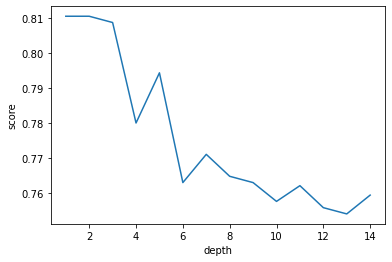

In [33]:
scores_list = []
for i in range(1,15):
    crossV(age5["Score_reference2"].to_numpy().reshape(-1,1),age5["Favorites"].to_numpy().reshape(-1,1), i)
depth = []
for i in range(1,15):
    depth.append(i)

d = {'score': scores_list, 'depth': depth}
d_pd = pd.DataFrame(d)
sb.lineplot(x='depth', y='score', data=d_pd)